In [8]:
!pip install split-folders

In [9]:
import splitfolders

In [10]:
splitfolders.ratio("/content/drive/MyDrive/Utensils-final/Raw", output="output", seed=1337, ratio=(.9, .1), group_prefix=None)

Copying files: 907 files [04:22,  3.45 files/s]


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [12]:
img = mping.imread("/content/drive/MyDrive/Utensils-final/Raw/BREAD_KNIFE/breadkniferaw2.JPG")

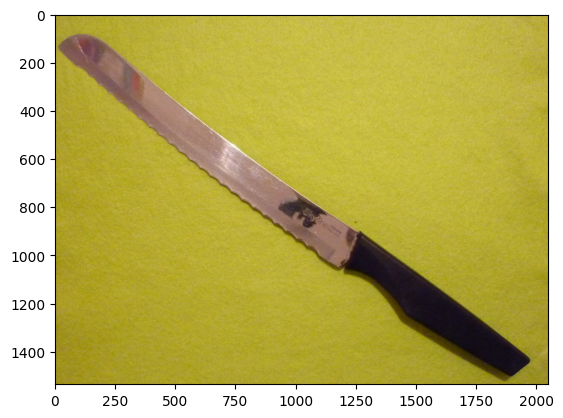

In [13]:
plt.imshow(img)

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2)

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train = train_datagen.flow_from_directory("output/train/",target_size=(224,224),seed=42,batch_size=32,class_mode="categorical")

Found 807 images belonging to 20 classes.


In [18]:
test = train_datagen.flow_from_directory("output/val/",target_size=(224,224),seed=42,batch_size=32,class_mode="categorical")

Found 100 images belonging to 20 classes.


In [19]:
from tensorflow.keras.preprocessing import image

In [20]:
test_image = image.load_img('/content/drive/MyDrive/Utensils-final/Raw/BREAD_KNIFE/breadkniferaw2.JPG', target_size=(224,224))

In [21]:
test_image = image.img_to_array(test_image)

In [22]:
test_image = tf.expand_dims(test_image,axis=0)

In [23]:
test_image = test_image/255.

In [24]:
test_image.shape

TensorShape([1, 224, 224, 3])

In [25]:
import tensorflow_hub as hub

In [26]:
m = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"),
tf.keras.layers.Dense(20, activation='softmax')
])

In [27]:
m.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [28]:
history = m.fit(train,epochs=5,steps_per_epoch=len(train),validation_data=test,validation_steps=len(test))

Epoch 1/5
26/26 [==============================] - 125s 4s/step - loss: 2.3660 - accuracy: 0.3296 - val_loss: 1.9202 - val_accuracy: 0.4300
Epoch 2/5
26/26 [==============================] - 116s 4s/step - loss: 1.4708 - accuracy: 0.6419 - val_loss: 1.4337 - val_accuracy: 0.6100
Epoch 3/5
26/26 [==============================] - 115s 4s/step - loss: 1.0620 - accuracy: 0.7732 - val_loss: 1.1486 - val_accuracy: 0.6700
Epoch 4/5
26/26 [==============================] - 114s 4s/step - loss: 0.8469 - accuracy: 0.8228 - val_loss: 1.1108 - val_accuracy: 0.6800
Epoch 5/5
26/26 [==============================] - 103s 4s/step - loss: 0.6979 - accuracy: 0.8476 - val_loss: 0.9090 - val_accuracy: 0.7500


In [29]:
classes=train.class_indices

In [30]:
classes=list(classes.keys())

In [31]:
m.predict(test_image)

1/1 [==============================] - 1s 1s/step


array([[0.00157404, 0.28417903, 0.00516821, 0.001956  , 0.02519242,
        0.2942204 , 0.0045356 , 0.2742364 , 0.0046235 , 0.00348475,
        0.00371662, 0.00205412, 0.01248378, 0.00670004, 0.00533637,
        0.03111448, 0.00251499, 0.02918038, 0.00322073, 0.00450822]],
      dtype=float32)

In [32]:
classes[tf.argmax(m.predict(test_image),axis=1).numpy()[0]]

1/1 [==============================] - 0s 81ms/step


'DINNER_KNIFE'

In [33]:
import pandas as pd

<Axes: >

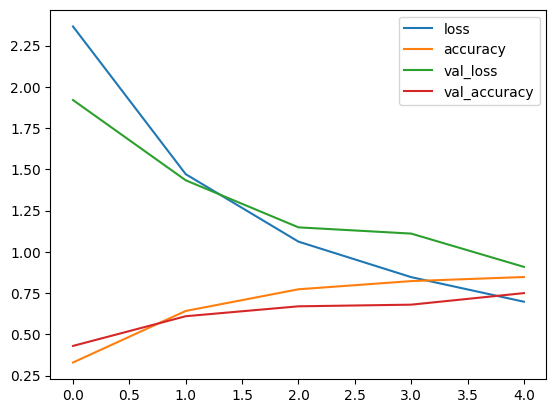

In [34]:
pd.DataFrame(history.history).plot()


In [35]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense (Dense)               (None, 20)                25620     
                                                                 
Total params: 4075184 (15.55 MB)
Trainable params: 25620 (100.08 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________
